In [1]:
import torch
import matplotlib.pyplot as plt

In [24]:
w=torch.tensor(-10.0,requires_grad=True)
x=torch.arange(-3,3,0.1).view(-1,1)
f=-3*x


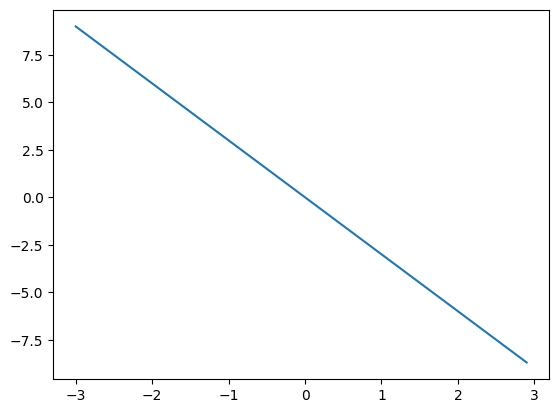

In [25]:
plt.plot(x.numpy(),f.numpy())
plt.show()

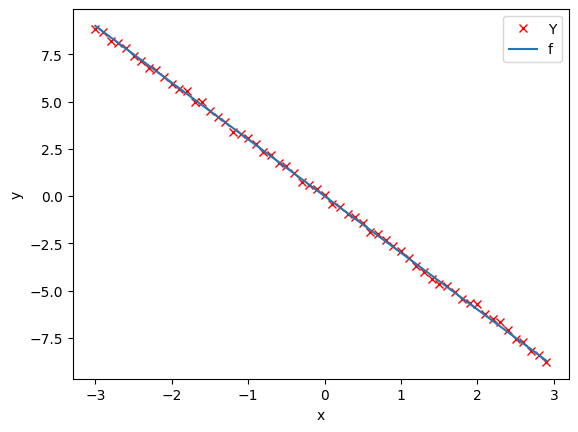

In [26]:
y=f+0.1*torch.randn(x.size())
plt.plot(x.numpy(), y.numpy(), 'rx', label = 'Y')

plt.plot(x.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [27]:
def forward(x):
    return w*x

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

    

In [28]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        print(type(X.numpy()))
        self.X = X.numpy()
       
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        # Convert lists to PyTorch tensors
        parameter_values_tensor = torch.tensor(self.parameter_values)
        loss_function_tensor = torch.tensor(self.Loss_function)

        # Plot using the tensors
        plt.plot(parameter_values_tensor.numpy(), loss_function_tensor.numpy())
  
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [29]:
lr=0.1
cost=[]
def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(x)
        
        # calculate the iteration
        loss = criterion(Yhat,y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        cost.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

In [30]:
gradient_plot = plot_diagram(x, y, w, stop = 5)

<class 'numpy.ndarray'>


C:\Users\polat\AppData\Local\Temp\ipykernel_11496\173732149.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


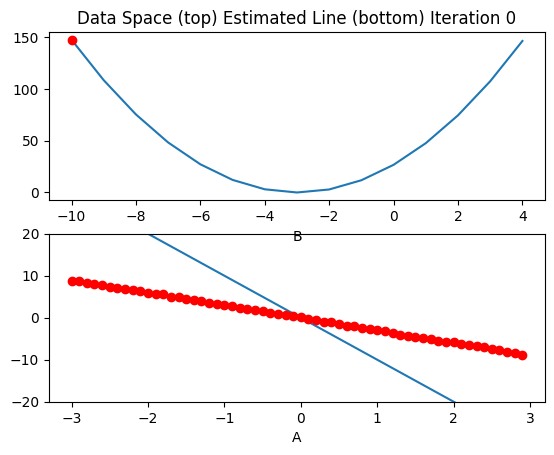

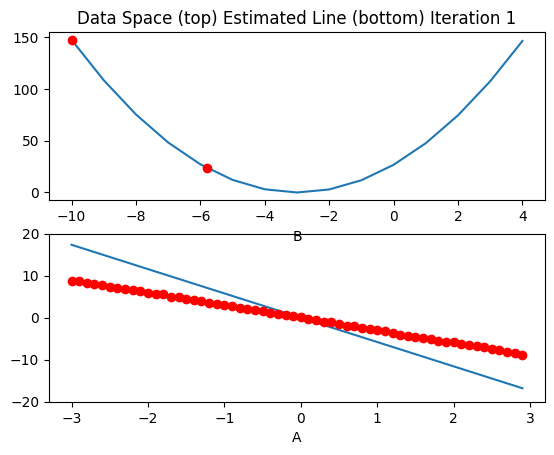

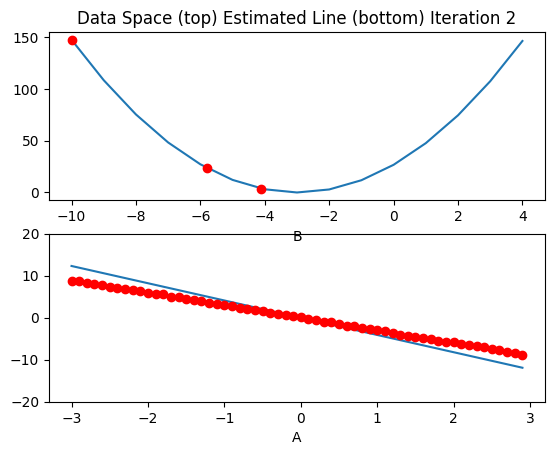

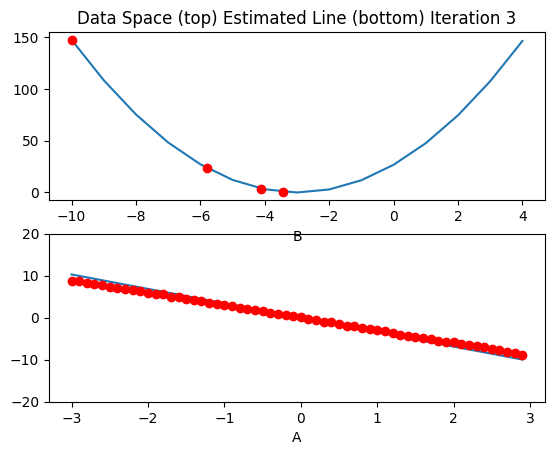

<Figure size 640x480 with 0 Axes>

In [31]:
train_model(4)

Text(38.347222222222214, 0.5, 'Cost')

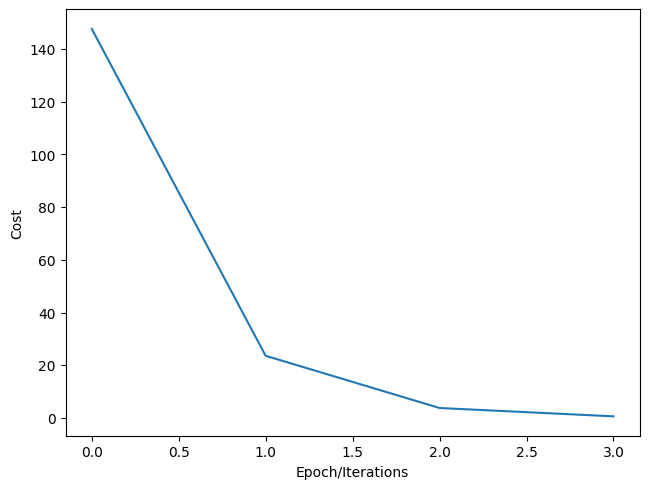

In [32]:
plt.plot(cost)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [33]:
w=torch.tensor(-15.0,requires_grad=True)
lr=0.1
cost2=[]
gradient_plot1 = plot_diagram(x, y, w, stop = 15)
def my_train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(x)
        
        # calculate the iteration
        loss = criterion(Yhat,y)
        
        # plot the diagram for us to have a better idea
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        cost2.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

<class 'numpy.ndarray'>


C:\Users\polat\AppData\Local\Temp\ipykernel_11496\173732149.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameter_values_tensor = torch.tensor(self.parameter_values)


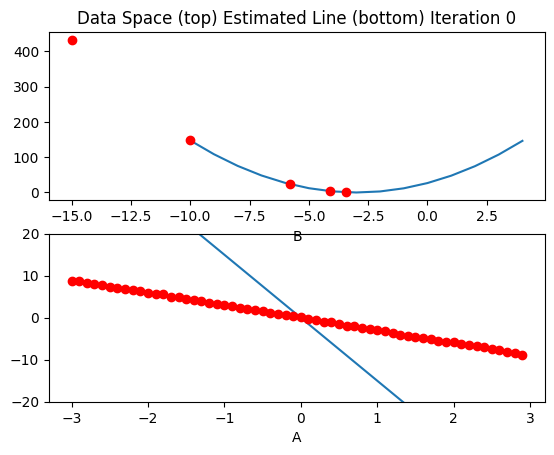

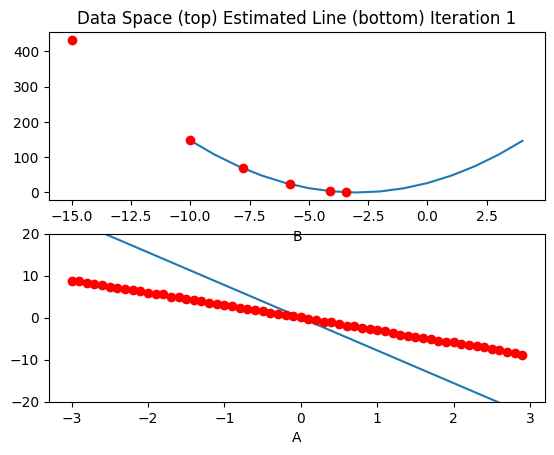

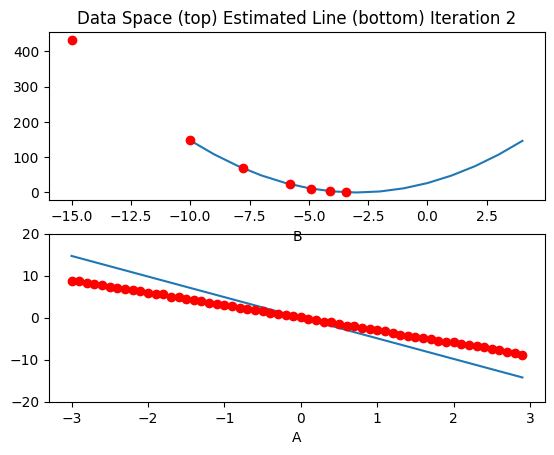

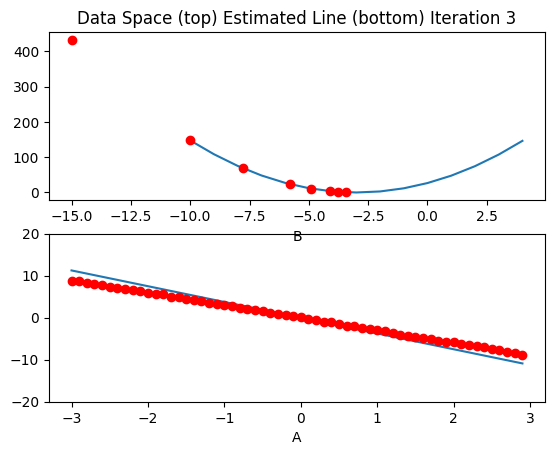

<Figure size 640x480 with 0 Axes>

In [34]:
my_train_model(4)

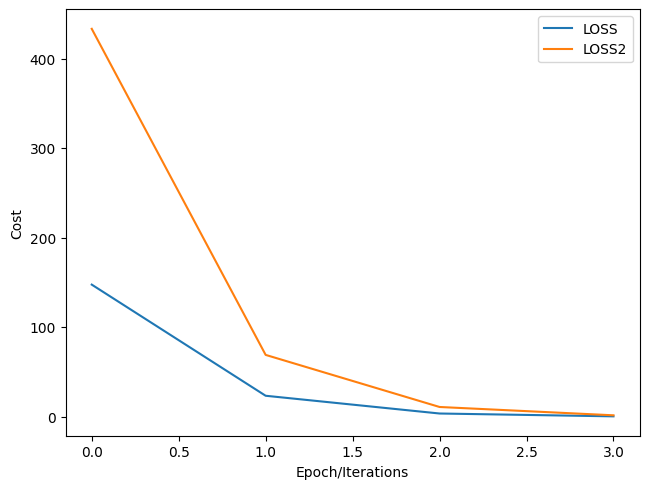

In [36]:
plt.plot(cost, label = "LOSS")
plt.plot(cost2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()